In [45]:
from datetime import datetime, timedelta
import datetime as dt
from sqlalchemy import create_engine, text
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree , DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import r2_score
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, f1_score , accuracy_score, classification_report ,recall_score,precision_score

import pytz

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR


from sklearn import svm


import warnings
warnings.filterwarnings("ignore")

In [46]:
class UserDefinedException(Exception):
    pass

In [47]:
def get_connection(user, password, host, port, database):
    return create_engine(
        url="postgresql://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        )
    )


def get_engine(db_user, password, db_name, db_host="localhost", port="5432"):
    print("Creating postgresDB engine")
    try:
        engine = None
        engine = get_connection(db_user, password, db_host, port, db_name)
        engine = engine.connect()
        print("Postgres engine created successfully")
        return engine
    except Exception as e:
        print(f"Failed while connecting to DB {e}")
        
def invoke_db_engine():
    
    return get_engine(db_user="postgres", password="welcome", db_name="crypto_currency")

postgres_engine =  invoke_db_engine()
    

Creating postgresDB engine
Postgres engine created successfully


In [48]:
try :
    if postgres_engine:
        print("DB engine is active..Proceeding further")
    else : raise UserDefinedException ("DB inactive, aborting process")
except UserDefinedException as e:
    print(e)

DB engine is active..Proceeding further


In [49]:

def get_data_from_database(query, engine):
    try:
        data = pd.read_sql(text(query) , con = engine)
        if data.empty:
            raise UserDefinedException("Data Not available")
        return data
    except UserDefinedException as e:
        print(e)
    except Exception as e:
        print(e)

In [50]:
def return_null_value_summary(data):
    return data.isnull().sum().to_dict()


In [51]:
crypto_currency_rates = get_data_from_database("select id ,symbol,rank,market_cap_usd market_usd,volume_usd,price_usd,change_percent from crypto_currency_rates;" , postgres_engine)
crypto_currency_rates.head(10)

,id,symbol,rank,market_usd,volume_usd,price_usd,change_percent
0,bitcoin,BTC,1,1.255458e+12,5.289899e+09,63746.74729,-0.519
1,ethereum,ETH,2,3.769060e+11,3.475851e+09,3138.32737,-0.157
2,tether,USDT,3,1.109607e+11,1.084850e+10,1.00054,-0.021
3,binance-coin,BNB,4,9.882173e+10,2.198478e+08,592.45231,0.069
4,solana,SOL,5,6.506796e+10,4.412362e+08,145.42238,-1.349
5,usd-coin,USDC,6,3.361730e+10,7.111737e+08,1.00031,-0.056
6,xrp,XRP,7,2.405243e+10,1.753052e+08,0.52974,-0.940
7,dogecoin,DOGE,8,2.326586e+10,6.995179e+08,0.16138,0.201
8,cardano,ADA,9,1.641345e+10,1.125819e+08,0.46037,-2.140
9,shiba-inu,SHIB,10,1.453834e+10,1.632309e+08,0.00002,-3.215


In [52]:

return_null_value_summary(crypto_currency_rates)

{'id': 0,
 'symbol': 0,
 'rank': 0,
 'market_usd': 0,
 'volume_usd': 0,
 'price_usd': 0,
 'change_percent': 0}

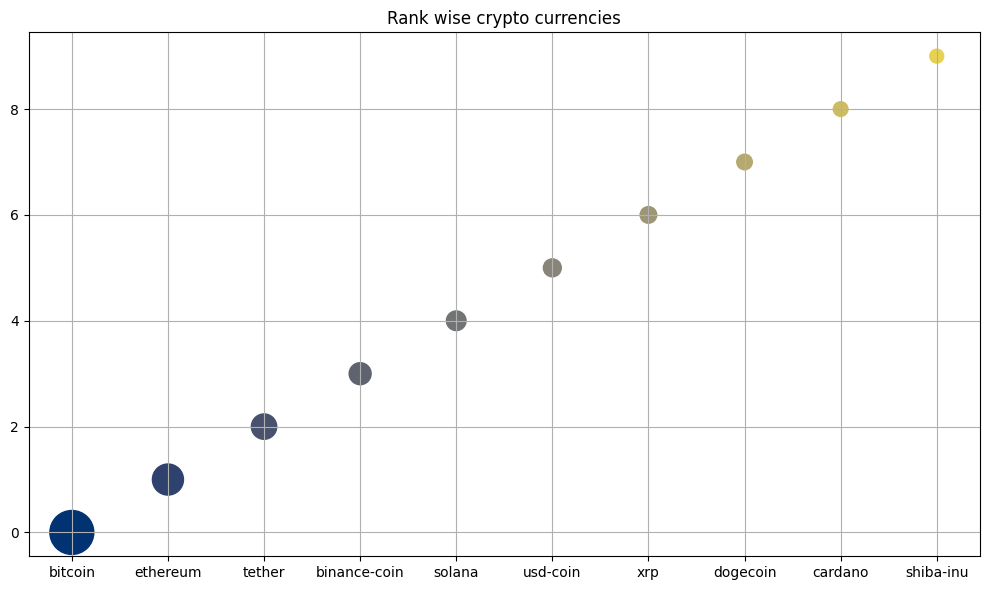

In [53]:
crypto_currency_rates_rank = crypto_currency_rates.sort_values(by='rank')
crypto_currency_rates_rank = crypto_currency_rates_rank.nlargest(10, 'market_usd')

colors = sns.color_palette("cividis", n_colors=len(crypto_currency_rates_rank))

plt.figure(figsize=(10, 6))

plt.scatter(x=crypto_currency_rates_rank['id'], 
            y=crypto_currency_rates_rank.index, 
            s=1000 / crypto_currency_rates_rank['rank'], 
            c=colors)

plt.title('Rank wise crypto currencies')
plt.grid(True)
plt.tight_layout()
plt.show()

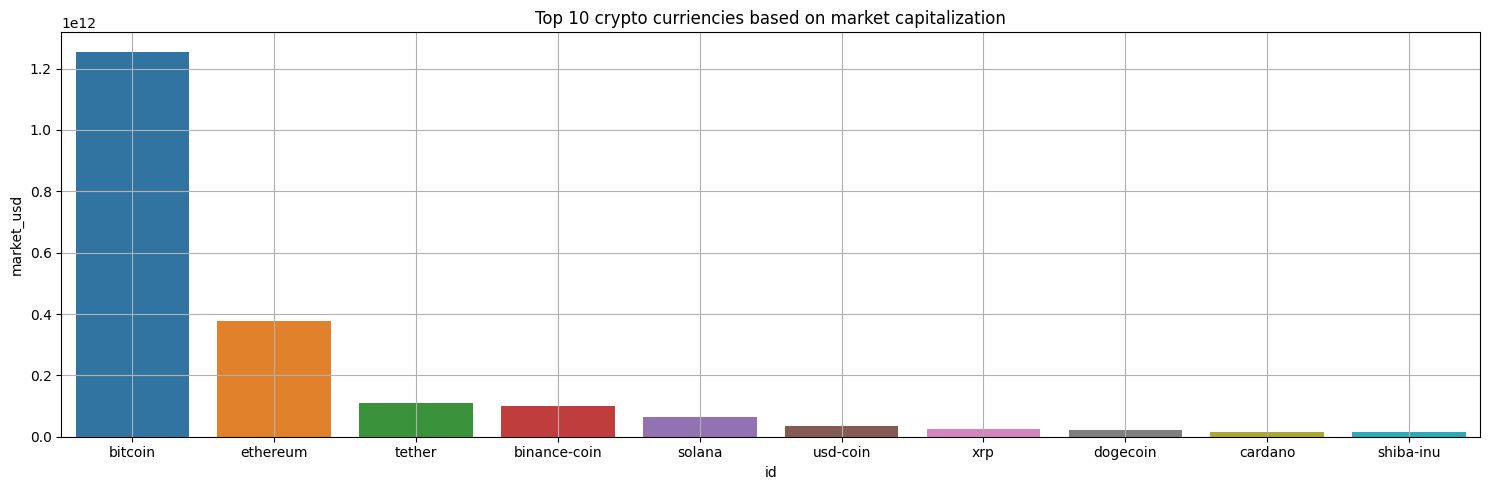

In [54]:
plt.subplots(figsize = ([15,5]))
crypto_currency_rates['market_usd'] = crypto_currency_rates['market_usd'].astype(float)

crypto_currency_rates_cost = crypto_currency_rates.nlargest(10, 'market_usd')
sns.barplot(x = 'id', y = 'market_usd' , data = crypto_currency_rates_cost )
plt.title('Top 10 crypto curriencies based on market capitalization')
plt.grid(True)
plt.tight_layout()
plt.show()

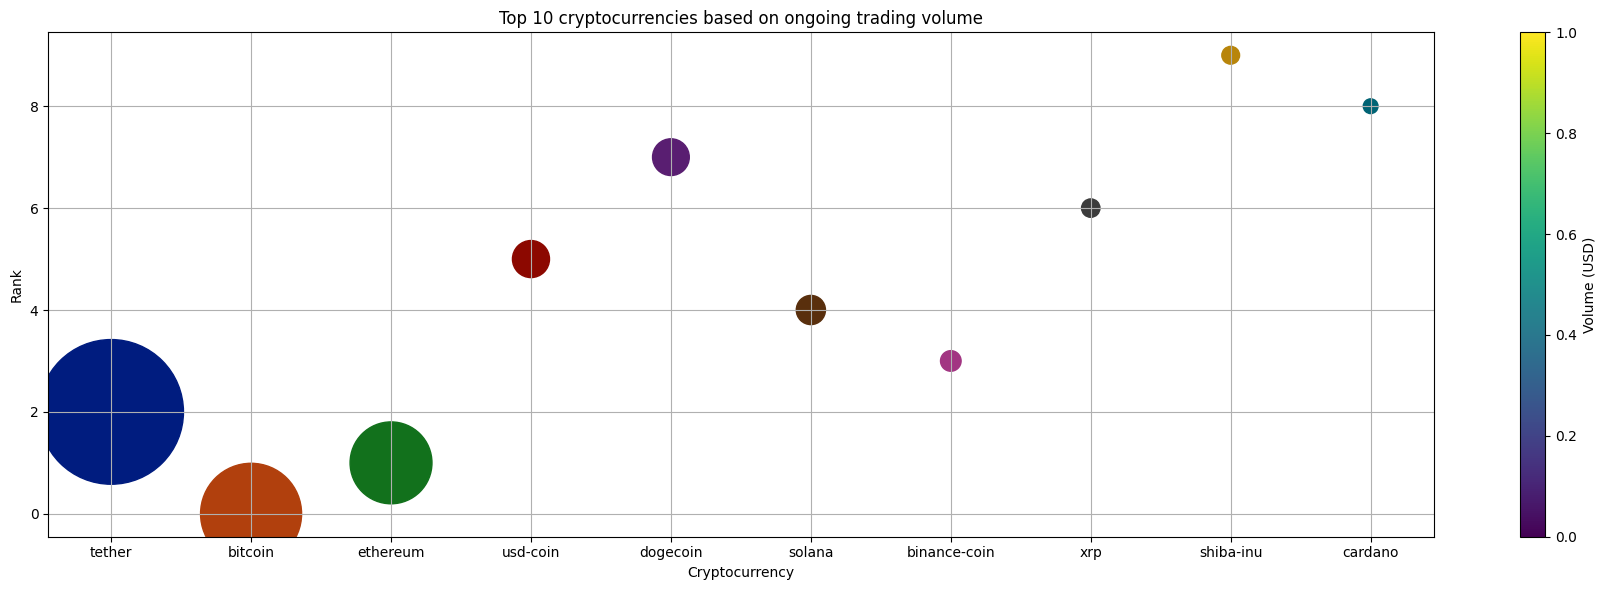

In [55]:
crypto_currency_rates_cost = crypto_currency_rates_cost.sort_values(by='volume_usd', ascending=False)
colors = sns.color_palette("dark", n_colors=len(crypto_currency_rates_cost))

plt.figure(figsize=(18, 6))
plt.scatter(x=crypto_currency_rates_cost['id'], y=crypto_currency_rates_cost.index,  
            s=crypto_currency_rates_cost['volume_usd'] / 1000000,  c=colors)

plt.xlabel('Cryptocurrency')
plt.ylabel('Rank')
plt.title('Top 10 cryptocurrencies based on ongoing trading volume')


plt.colorbar().set_label('Volume (USD)')

plt.grid(True)
plt.tight_layout()
plt.show()


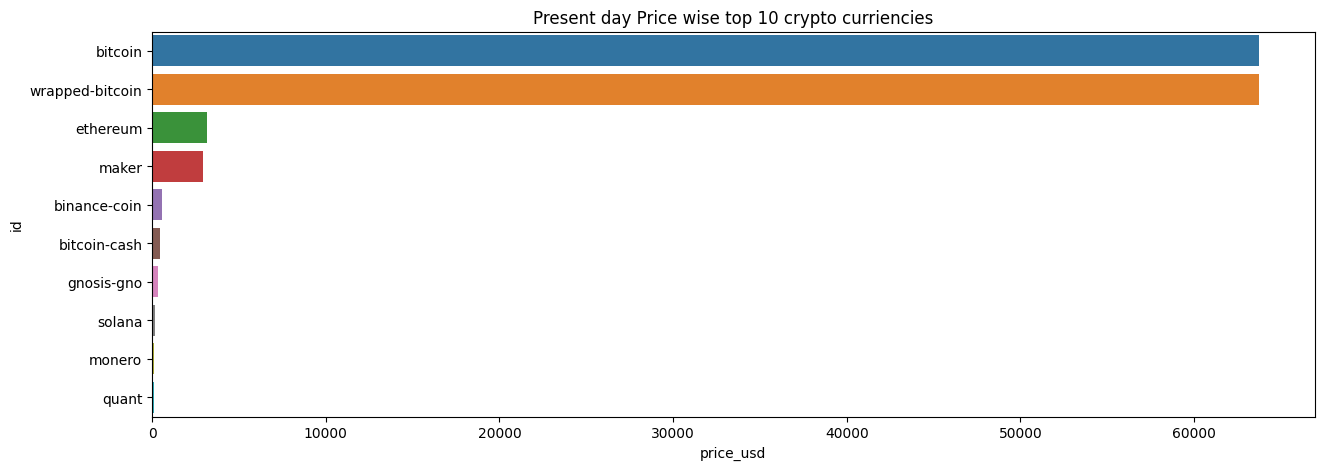

In [56]:
plt.subplots(figsize = ([15,5]))
crypto_currency_rates['price_usd'] = crypto_currency_rates['price_usd'].astype(float)

crypto_currency_rates_cost = crypto_currency_rates.nlargest(10, 'price_usd')
sns.barplot(y = 'id', x = 'price_usd' , data = crypto_currency_rates_cost )
plt.title('Present day Price wise top 10 crypto curriencies')
plt.show()

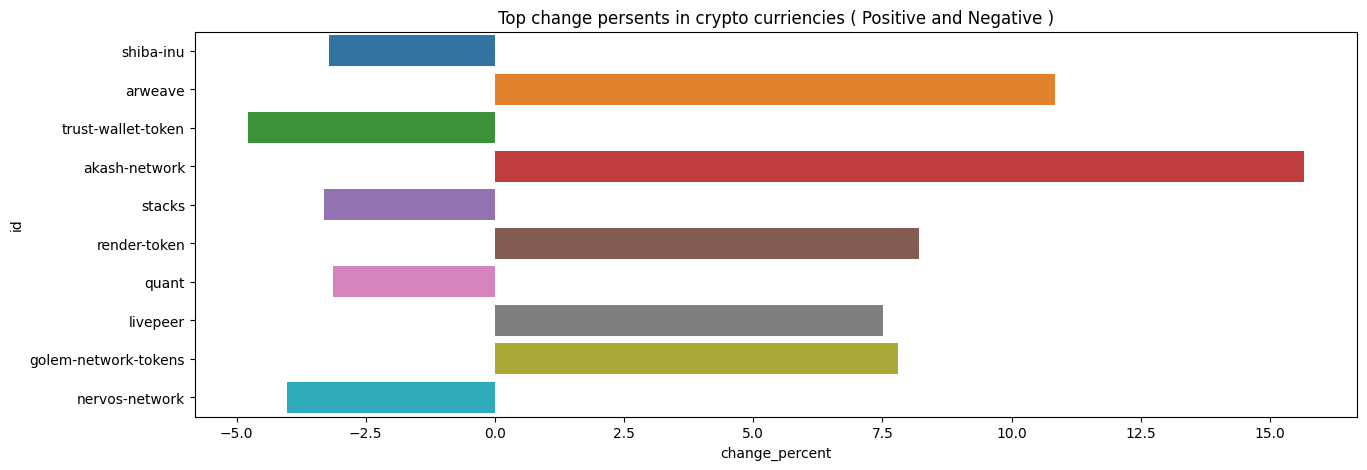

In [57]:
plt.subplots(figsize = ([15,5]))
crypto_currency_rates['change_percent'] = crypto_currency_rates['change_percent'].astype(float)
crypto_currency_rates_cost_largest = crypto_currency_rates.nlargest(5, 'change_percent')
crypto_currency_rates_cost_smallest = crypto_currency_rates.nsmallest(5, 'change_percent')

change_percent_merged_df = pd.concat([crypto_currency_rates_cost_largest, crypto_currency_rates_cost_smallest], axis=0)
change_percent_merged_df = change_percent_merged_df.sample(frac=1, random_state=42)  
change_percent_merged_df.reset_index(drop=True, inplace=True)

sns.barplot(y = 'id', x = 'change_percent' , data = change_percent_merged_df )
plt.title('Top change persents in crypto curriencies ( Positive and Negative )')
plt.show()

In [58]:
crypto_currency_dumps_query = f"""select * from crypto_currency_rates_dump order by last_updated desc; """  

crypto_currency_dump = get_data_from_database(crypto_currency_dumps_query , postgres_engine)

crypto_currency_dump.head(10)

,id,symbol,rank,market_cap_usd,volume_usd,price_usd,change_percent,last_updated,inserted_at
0,ravencoin,RVN,100,4.262874e+08,5.034253e+06,0.03087,0.055,2024-05-05 20:25:02.982615+00:00,2024-05-05 20:30:03.419439+00:00
1,holo,HOT,99,4.270483e+08,1.887143e+06,0.00246,-1.831,2024-05-05 20:25:02.982049+00:00,2024-05-05 20:30:03.419439+00:00
2,enjin-coin,ENJ,98,4.272426e+08,4.479401e+06,0.30963,-0.964,2024-05-05 20:25:02.981495+00:00,2024-05-05 20:30:03.419439+00:00
3,zilliqa,ZIL,97,4.298399e+08,7.304130e+06,0.02474,-0.281,2024-05-05 20:25:02.980929+00:00,2024-05-05 20:30:03.419439+00:00
4,celo,CELO,96,4.393540e+08,2.836900e+06,0.81866,-0.125,2024-05-05 20:25:02.980311+00:00,2024-05-05 20:30:03.419439+00:00
5,raydium,RAY,95,4.418676e+08,3.301313e+06,1.68137,1.754,2024-05-05 20:25:02.979686+00:00,2024-05-05 20:30:03.419439+00:00
6,nxm,NXM,94,4.466615e+08,9.445758e+05,67.73687,2.195,2024-05-05 20:25:02.979155+00:00,2024-05-05 20:30:03.419439+00:00
7,1inch,1INCH,93,4.529982e+08,1.357231e+07,0.39112,-0.321,2024-05-05 20:25:02.978625+00:00,2024-05-05 20:30:03.419439+00:00
8,compound,COMP,92,4.702409e+08,7.297529e+06,57.95125,-0.742,2024-05-05 20:25:02.978095+00:00,2024-05-05 20:30:03.419439+00:00
9,trust-wallet-token,TWT,91,4.720598e+08,3.470069e+06,1.13299,-4.781,2024-05-05 20:25:02.977568+00:00,2024-05-05 20:30:03.419439+00:00


In [59]:
crypto_historic_data_query = f"""select id ,price , fetched_at from crypto_historic_data"""  
historic_data = get_data_from_database(crypto_historic_data_query , postgres_engine)
historic_data.head(10)

,id,price,fetched_at
0,bitcoin,30393.85547,2023-04-16 00:00:00-04:00
1,bitcoin,29735.32735,2023-04-17 00:00:00-04:00
2,bitcoin,29980.32349,2023-04-18 00:00:00-04:00
3,bitcoin,29599.23203,2023-04-19 00:00:00-04:00
4,bitcoin,28693.58711,2023-04-20 00:00:00-04:00
5,bitcoin,27989.45234,2023-04-21 00:00:00-04:00
6,bitcoin,27514.09172,2023-04-22 00:00:00-04:00
7,bitcoin,27697.61936,2023-04-23 00:00:00-04:00
8,bitcoin,27571.81476,2023-04-24 00:00:00-04:00
9,bitcoin,27583.35043,2023-04-25 00:00:00-04:00


In [60]:

est_timezone = pytz.timezone('US/Eastern')

crypto_currency_dump['last_updated'] = pd.to_datetime(crypto_currency_dump['last_updated'], utc=True).dt.tz_convert(est_timezone)
crypto_currency_dump['inserted_at'] = pd.to_datetime(crypto_currency_dump['inserted_at'], utc=True).dt.tz_convert(est_timezone)


crypto_currency_dump.head(100)


,id,symbol,rank,market_cap_usd,volume_usd,price_usd,change_percent,last_updated,inserted_at
0,ravencoin,RVN,100,4.262874e+08,5.034253e+06,0.03087,0.055,2024-05-05 16:25:02.982615-04:00,2024-05-05 16:30:03.419439-04:00
1,holo,HOT,99,4.270483e+08,1.887143e+06,0.00246,-1.831,2024-05-05 16:25:02.982049-04:00,2024-05-05 16:30:03.419439-04:00
2,enjin-coin,ENJ,98,4.272426e+08,4.479401e+06,0.30963,-0.964,2024-05-05 16:25:02.981495-04:00,2024-05-05 16:30:03.419439-04:00
3,zilliqa,ZIL,97,4.298399e+08,7.304130e+06,0.02474,-0.281,2024-05-05 16:25:02.980929-04:00,2024-05-05 16:30:03.419439-04:00
4,celo,CELO,96,4.393540e+08,2.836900e+06,0.81866,-0.125,2024-05-05 16:25:02.980311-04:00,2024-05-05 16:30:03.419439-04:00
...,...,...,...,...,...,...,...,...,...
95,solana,SOL,5,6.515138e+10,4.416105e+08,145.60881,-1.266,2024-05-05 16:25:02.927432-04:00,2024-05-05 16:30:03.419439-04:00
96,binance-coin,BNB,4,9.886712e+10,2.196179e+08,592.72443,0.015,2024-05-05 16:25:02.926220-04:00,2024-05-05 16:30:03.419439-04:00
97,tether,USDT,3,1.110085e+11,1.082683e+10,1.00097,-0.013,2024-05-05 16:25:02.924807-04:00,2024-05-05 16:30:03.419439-04:00
98,ethereum,ETH,2,3.772944e+11,3.481955e+09,3141.56140,-0.103,2024-05-05 16:25:02.921663-04:00,2024-05-05 16:30:03.419439-04:00


In [61]:

window_difference = datetime.now(pytz.timezone('America/New_York')  ) - timedelta(minutes=120)
window_data_dump = crypto_currency_dump[crypto_currency_dump['inserted_at'] > window_difference ]
window_data_dump = window_data_dump[window_data_dump['inserted_at'] ==  max(window_data_dump['inserted_at'])]


In [62]:
excluded_columns = ['id' ]
columns_to_prefix = [col if col in excluded_columns else 'window_' + col for col in window_data_dump.columns]
window_data_dump = window_data_dump.rename(columns=dict(zip(window_data_dump.columns, columns_to_prefix)))


In [63]:
merged_df = pd.merge(crypto_currency_rates, window_data_dump, on='id', how='inner')  
columns_to_delete  = [  'window_symbol' , 'window_last_updated' , 'window_inserted_at'  ]
# merged_df = merged_df.drop(columns=columns_to_delete)
merged_df.head()

,id,symbol,rank,market_usd,volume_usd,price_usd,change_percent,window_symbol,window_rank,window_market_cap_usd,window_volume_usd,window_price_usd,window_change_percent,window_last_updated,window_inserted_at
0,bitcoin,BTC,1,1.255458e+12,5.289899e+09,63746.74729,-0.519,BTC,1,1.256961e+12,5.293920e+09,63823.07783,-0.437,2024-05-05 16:25:02.917294-04:00,2024-05-05 16:30:03.419439-04:00
1,ethereum,ETH,2,3.769060e+11,3.475851e+09,3138.32737,-0.157,ETH,2,3.772944e+11,3.481955e+09,3141.56140,-0.103,2024-05-05 16:25:02.921663-04:00,2024-05-05 16:30:03.419439-04:00
2,tether,USDT,3,1.109607e+11,1.084850e+10,1.00054,-0.021,USDT,3,1.110085e+11,1.082683e+10,1.00097,-0.013,2024-05-05 16:25:02.924807-04:00,2024-05-05 16:30:03.419439-04:00
3,binance-coin,BNB,4,9.882173e+10,2.198478e+08,592.45231,0.069,BNB,4,9.886712e+10,2.196179e+08,592.72443,0.015,2024-05-05 16:25:02.926220-04:00,2024-05-05 16:30:03.419439-04:00
4,solana,SOL,5,6.506796e+10,4.412362e+08,145.42238,-1.349,SOL,5,6.515138e+10,4.416105e+08,145.60881,-1.266,2024-05-05 16:25:02.927432-04:00,2024-05-05 16:30:03.419439-04:00


In [64]:
merged_df['difference'] = merged_df[['price_usd', 'window_price_usd']].apply(lambda x : x['price_usd']-x['window_price_usd'],axis = 1)
merged_df['status'] = merged_df['difference'].apply(lambda x: 
 'Loss' if   x < 0 else ('stable' if x<=0.25 else 'Gain'))
merged_df.head()

,id,symbol,rank,market_usd,volume_usd,price_usd,change_percent,window_symbol,window_rank,window_market_cap_usd,window_volume_usd,window_price_usd,window_change_percent,window_last_updated,window_inserted_at,difference,status
0,bitcoin,BTC,1,1.255458e+12,5.289899e+09,63746.74729,-0.519,BTC,1,1.256961e+12,5.293920e+09,63823.07783,-0.437,2024-05-05 16:25:02.917294-04:00,2024-05-05 16:30:03.419439-04:00,-76.33054,Loss
1,ethereum,ETH,2,3.769060e+11,3.475851e+09,3138.32737,-0.157,ETH,2,3.772944e+11,3.481955e+09,3141.56140,-0.103,2024-05-05 16:25:02.921663-04:00,2024-05-05 16:30:03.419439-04:00,-3.23403,Loss
2,tether,USDT,3,1.109607e+11,1.084850e+10,1.00054,-0.021,USDT,3,1.110085e+11,1.082683e+10,1.00097,-0.013,2024-05-05 16:25:02.924807-04:00,2024-05-05 16:30:03.419439-04:00,-0.00043,Loss
3,binance-coin,BNB,4,9.882173e+10,2.198478e+08,592.45231,0.069,BNB,4,9.886712e+10,2.196179e+08,592.72443,0.015,2024-05-05 16:25:02.926220-04:00,2024-05-05 16:30:03.419439-04:00,-0.27212,Loss
4,solana,SOL,5,6.506796e+10,4.412362e+08,145.42238,-1.349,SOL,5,6.515138e+10,4.416105e+08,145.60881,-1.266,2024-05-05 16:25:02.927432-04:00,2024-05-05 16:30:03.419439-04:00,-0.18643,Loss


In [65]:
(merged_df[merged_df['status'] == 'Gain'])

,id,symbol,rank,market_usd,volume_usd,price_usd,change_percent,window_symbol,window_rank,window_market_cap_usd,window_volume_usd,window_price_usd,window_change_percent,window_last_updated,window_inserted_at,difference,status
14,bitcoin-cash,BCH,15,9.211643e+09,8.195907e+07,467.55859,-0.322,BCH,15,9.202081e+09,8.195576e+07,467.07323,-0.392,2024-05-05 16:25:02.935638-04:00,2024-05-05 16:30:03.419439-04:00,0.48536,Gain


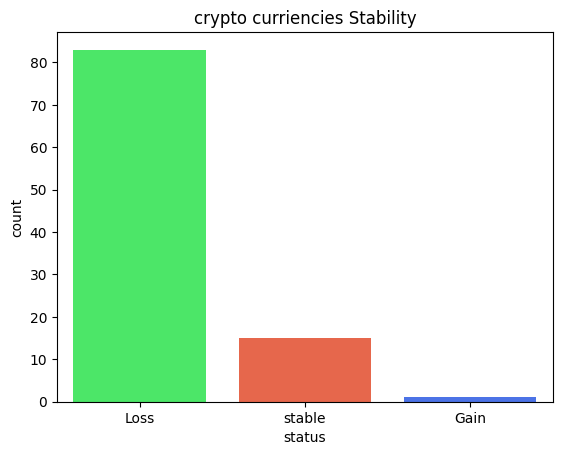

In [66]:
sns.countplot(x='status',   palette=[ "#33ff57" , "#ff5733", "#3366ff"]  , data=merged_df )
plt.title('crypto curriencies Stability')
         
plt.show()

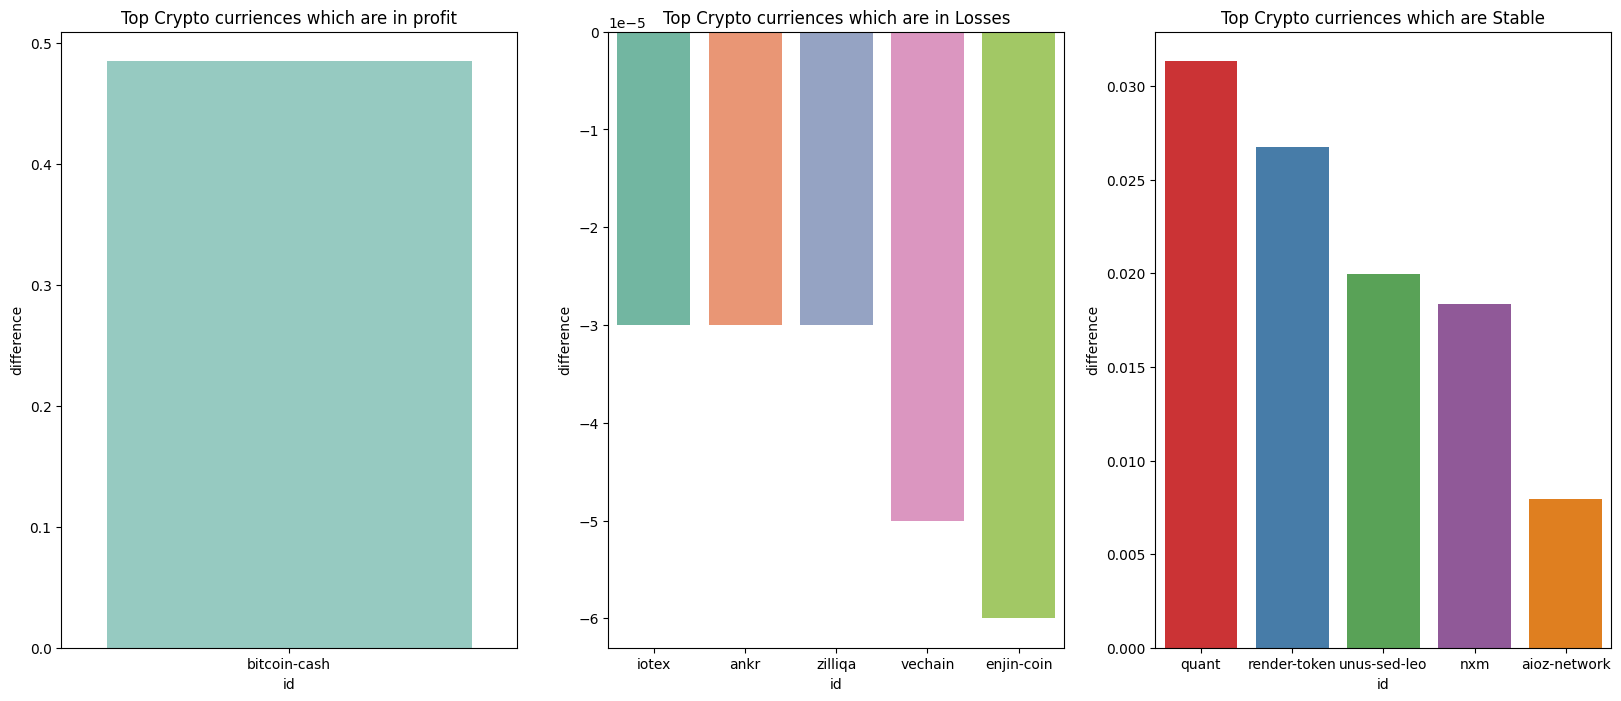

In [67]:
fig, (axis1, axis2 , axis3) = plt.subplots(1, 3, figsize=(20, 8))
gain_data = merged_df[merged_df['status'] == 'Gain'].nlargest(5, 'difference')
stable_data = merged_df[merged_df['status'] == 'stable'].nlargest(5, 'difference')
loss_data = merged_df[merged_df['status'] == 'Loss'].nlargest(5, 'difference')

sns.barplot(x = 'id', y = 'difference' , palette="Set3", data = gain_data,ax = axis1 ).set_title("Top Crypto curriences which are in profit")
sns.barplot(x = 'id', y = 'difference' , palette="Set2" ,data = loss_data,ax = axis2 ).set_title("Top Crypto curriences which are in Losses")
sns.barplot(x = 'id', y = 'difference' , palette="Set1", data = stable_data,ax = axis3 ).set_title("Top Crypto curriences which are Stable")

plt.show()

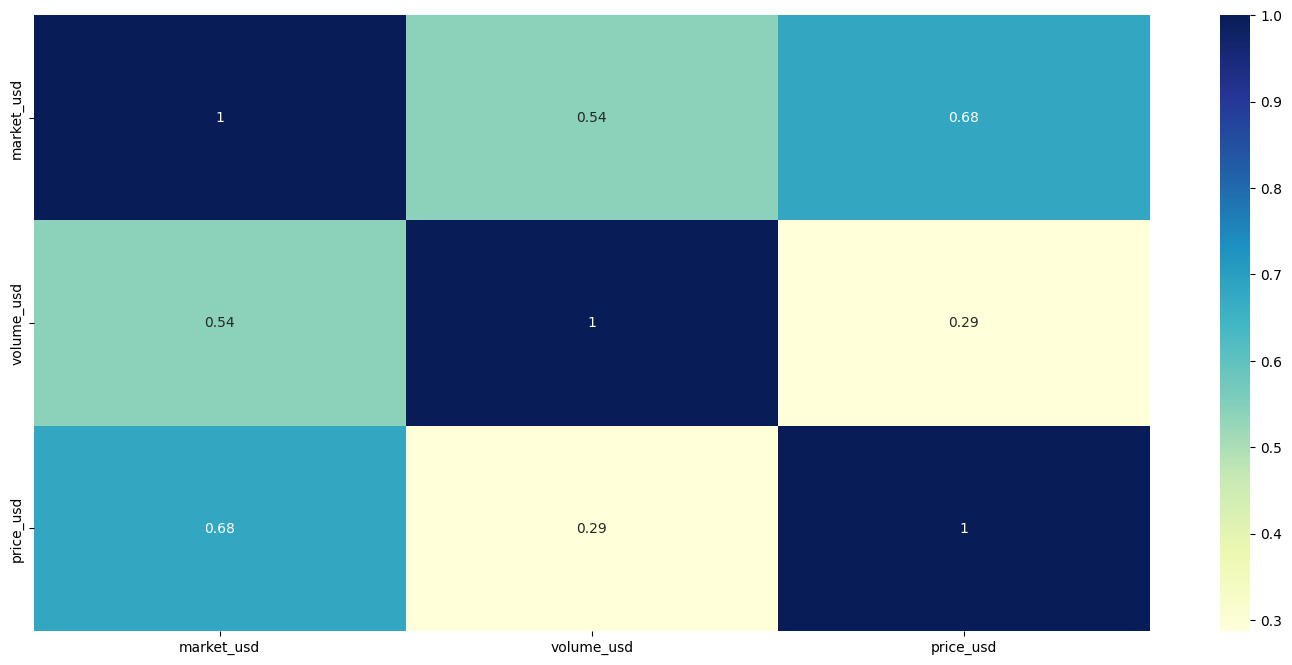

In [68]:
plt.subplots(figsize = ([18,8]))
price_cols = [col for col in crypto_currency_rates.columns if col.endswith('usd')]
sns.heatmap(crypto_currency_rates[price_cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [69]:
crypto_currency_id = input("Enter Crypto Id you want to work on : ")
if len(crypto_currency_id) == 0:
    crypto_currency_id = 'bitcoin'

Enter Crypto Id you want to work on : 


In [70]:
historic_data_crypto_currency_dump = historic_data[historic_data['id'] == crypto_currency_id]

In [71]:
crypto_currency_dump_filtered = pd.DataFrame()
crypto_currency_dump_temp =  crypto_currency_dump[crypto_currency_dump['id'] == crypto_currency_id]
crypto_currency_dump_filtered[['id' , 'price' , 'fetched_at']] = crypto_currency_dump_temp[['id' ,'price_usd' , 'last_updated']]

In [72]:
final_dump = pd.concat([historic_data_crypto_currency_dump, crypto_currency_dump_filtered])
final_dump = final_dump.sort_values(by='fetched_at').reset_index(drop=True)

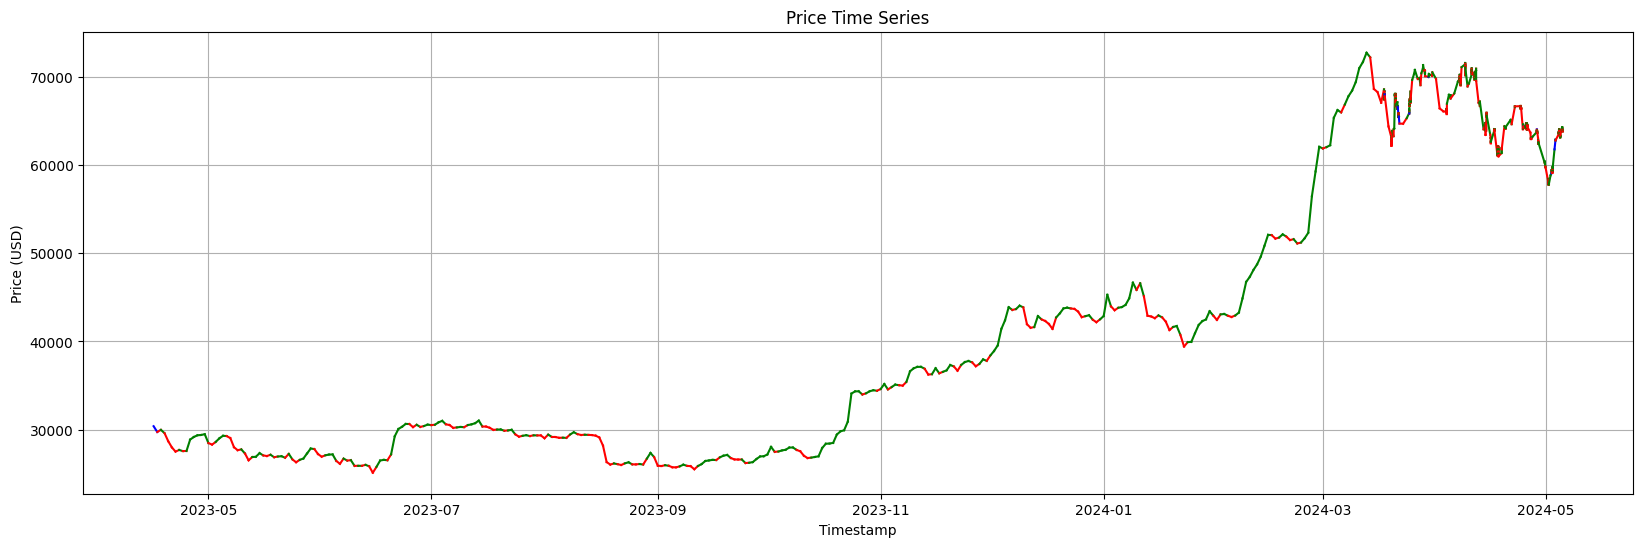

In [73]:
import matplotlib.pyplot as plt

x_values = final_dump['fetched_at']
y_values = final_dump['price']

colors = ['blue']

for i in range(1, len(y_values)):
    if y_values.iloc[i] > y_values.iloc[i - 1]:
        colors.append('green')  
    elif y_values.iloc[i] < y_values.iloc[i - 1]:
        colors.append('red')  
    else:
        colors.append('blue')  
        
plt.figure(figsize=(20, 6))
for i in range(len(x_values) - 1):
    plt.plot([x_values.iloc[i], x_values.iloc[i + 1]], [y_values.iloc[i], y_values.iloc[i + 1]], color=colors[i])

plt.xlabel('Timestamp')
plt.ylabel('Price (USD)')
plt.title('Price Time Series')

plt.grid(True)
plt.show()

In [74]:
final_dump['50DaySMA'] = final_dump['price'].rolling(window=50).mean()
final_dump['200DaySMA'] = final_dump['price'].rolling(window=200).mean()

final_dump['signal'] = np.where(final_dump['50DaySMA'] > final_dump['200DaySMA'], 1, 0)
final_dump['stock_signal'] = np.where(final_dump['50DaySMA'] > final_dump['200DaySMA'], 1, -1)

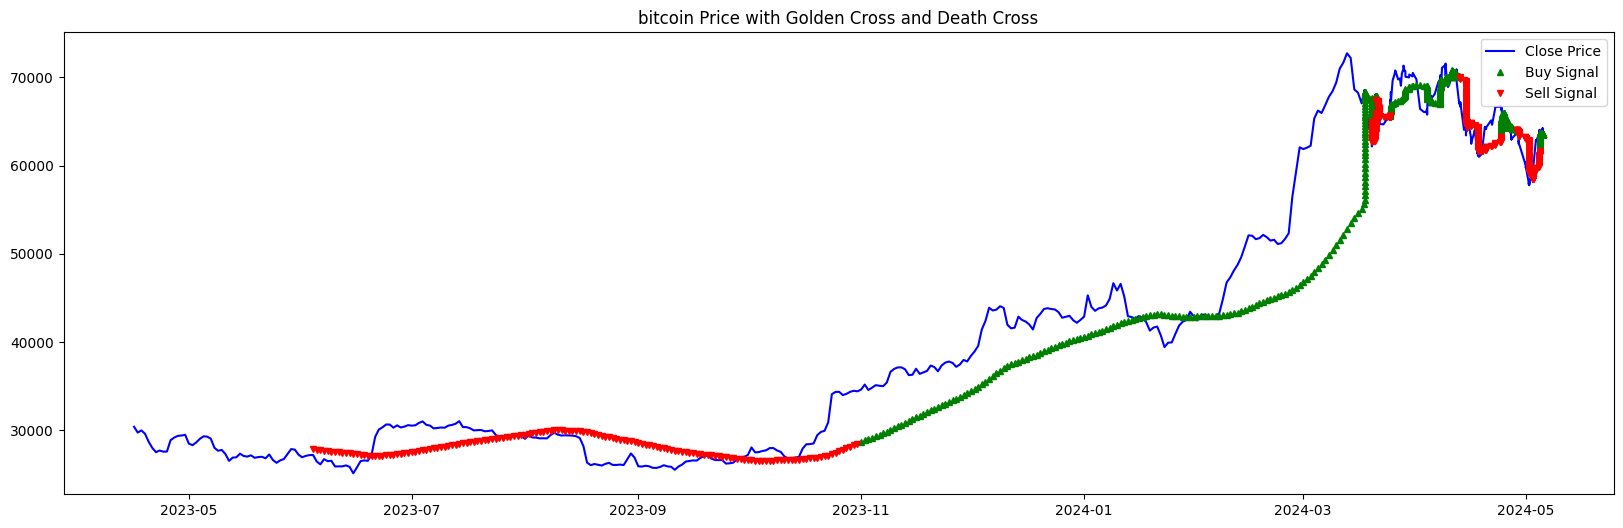

In [75]:
plt.figure(figsize=(20, 6))
plt.plot(x_values, y_values, color = 'b' ,  label='Close Price')


plt.plot(final_dump['fetched_at'][final_dump['signal'] == 1.0],
         final_dump['50DaySMA'][final_dump['signal'] == 1.0],
         '^', markersize=5, color='g', lw=0, label='Buy Signal')

plt.plot(final_dump['fetched_at'][final_dump['signal'] == 0.0],
         final_dump['50DaySMA'][final_dump['signal'] == 0.0],
         'v', markersize=5, color='r', lw=0, label='Sell Signal')

plt.title(f'{crypto_currency_id} Price with Golden Cross and Death Cross')
plt.legend()
plt.show()

In [76]:
def split_data(feature , dependent,  random_state = 20):
    X_train, X_test, Y_train, Y_test = train_test_split(
                                    feature,  dependent,  test_size = 0.3 ,  random_state = random_state)
    print(f"Train and test data shapes {X_train.shape} , {X_test.shape}" , end = "\n\n")
    return X_train, X_test, Y_train, Y_test


def evaluate_regression(model , X_train, y_train , X_test , y_test, source , epochs=0 ):
    if epochs <= 0:
        model.fit(X_train, y_train)
    else : model.fit(X_train, y_train, epochs = epochs)
    prediction = model.predict(X_test)
    return compute_scores(model,prediction ,y_test,source )

def compute_scores(model,Predicted_values , Test_values , source , threshold = 80):
    mse = mean_squared_error(Predicted_values, Test_values)
    rmse = np.sqrt(mse)
    r2_Score = r2_score(Predicted_values, Test_values)
    df = pd.DataFrame({"Model"           : [type(model).__name__],
                       "accuracy"  :np.mean(np.abs(Predicted_values - Test_values.values.flatten()) <= threshold) * 100,
                       "mse"        : [mse],
                       "rmse"          : [rmse],
                       "r2_Score"       : [r2_Score],
                       "model_source" : source
                      })

    return df.reset_index(drop = True)

In [77]:
label_encoder = LabelEncoder()
crypto_currency_dump['crypto_id'] = label_encoder.fit_transform(crypto_currency_dump['id'])

crypto_dict = dict(zip(crypto_currency_dump['symbol'], crypto_currency_dump['crypto_id']))

In [78]:
feature = ['crypto_id' ,  'market_cap_usd', 'volume_usd','change_percent' ]
depandent = ['price_usd']

feature_data = crypto_currency_dump[feature]
depandent_data = crypto_currency_dump[depandent]

scaler = StandardScaler()
feature_data = scaler.fit_transform(feature_data)


X_train, X_test, y_train, y_test = split_data(feature_data , depandent_data)

Train and test data shapes (101990, 4) , (43710, 4)



In [79]:

def initialize_models():
    
    decision_tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=2, min_samples_leaf=1)
    gradient_boosting_regressor =  GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
    random_forest_regressor =  RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
    svm_regressor =  SVR(kernel='rbf', C=1.0, epsilon=0.1)
    ann_model = initialize_neural_network_model()

    
    return decision_tree_regressor ,  gradient_boosting_regressor , random_forest_regressor,svm_regressor,ann_model

def initialize_neural_network_model():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(lr=0.01)) 
    return model

decision_tree_regressor ,  gradient_boosting_regressor , random_forest_regressor,svm_regressor,ann_model = initialize_models()
final_data_frame = pd.DataFrame()

In [80]:
final_data_frame = final_data_frame.append(evaluate_regression(decision_tree_regressor , X_train,y_train, X_test, y_test , "Price prediction")
                                           ,ignore_index = True)
final_data_frame = final_data_frame.append(evaluate_regression(random_forest_regressor , X_train,y_train, X_test, y_test , "Price prediction")
                                           ,ignore_index = True)
final_data_frame = final_data_frame.append(evaluate_regression(gradient_boosting_regressor , X_train,y_train, X_test, y_test , "Price prediction")
                                           ,ignore_index = True)
final_data_frame = final_data_frame.append(evaluate_regression(svm_regressor , X_train,y_train, X_test, y_test , "Price prediction")
                                           ,ignore_index = True)
final_data_frame = final_data_frame.append(evaluate_regression(ann_model , X_train,y_train, X_test, y_test , "Price prediction",20)
                                           ,ignore_index = True)

Epoch 1/20
3188/3188 [==============================] - 1s 370us/step - loss: 49396212.0000
Epoch 2/20
3188/3188 [==============================] - 1s 357us/step - loss: 36611024.0000
Epoch 3/20
3188/3188 [==============================] - 1s 355us/step - loss: 28466546.0000
Epoch 4/20
3188/3188 [==============================] - 1s 355us/step - loss: 18074198.0000
Epoch 5/20
3188/3188 [==============================] - 1s 364us/step - loss: 9826104.0000
Epoch 6/20
3188/3188 [==============================] - 1s 364us/step - loss: 5411464.0000
Epoch 7/20
3188/3188 [==============================] - 1s 355us/step - loss: 3942069.0000
Epoch 8/20
3188/3188 [==============================] - 1s 358us/step - loss: 3418862.0000
Epoch 9/20
3188/3188 [==============================] - 1s 357us/step - loss: 3203012.7500
Epoch 10/20
3188/3188 [==============================] - 1s 356us/step - loss: 2891678.7500
Epoch 11/20
3188/3188 [==============================] - 1s 355us/step - loss: 270217

In [81]:
final_data_frame.head()

,Model,accuracy,mse,rmse,r2_Score,model_source
0,DecisionTreeRegressor,86.238847,1.039678e+05,322.440374,0.998758,Price prediction
1,RandomForestRegressor,99.784946,3.800611e+02,19.495156,0.999995,Price prediction
2,GradientBoostingRegressor,92.717914,1.262604e+04,112.365661,0.999849,Price prediction
3,SVR,88.892702,8.484843e+07,9211.320755,-6584.703740,Price prediction
4,Sequential,13.775175,5.124232e+05,715.837378,0.993148,Price prediction


In [82]:

def initilize_classification_models():
    random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42,max_depth = 9, criterion = "gini")
    xg_boost_classifier = XGBClassifier(base_score=0.5, booster='gbtree',learning_rate=1)
    knn_classifier = KNeighborsClassifier(n_neighbors=3)
    gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    svm_classifier = SVC()


    return  random_forest_classifier , xg_boost_classifier , knn_classifier , gb_classifier,svm_classifier

random_forest_classifier , xg_boost_classifier , knn_classifier , gb_classifier,svm_classifier = initilize_classification_models()
final_data_frame = pd.DataFrame()

In [83]:

def evaluate_classification(model, X_train, X_test, Y_train, Y_test , source ):
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    recallscore = recall_score(Y_test, predictions,average='micro')
    precision = precision_score(Y_test, predictions, average='micro')
    f1score = f1_score(Y_test, predictions , average='micro') 
    df = pd.DataFrame({"Model"           : [type(model).__name__],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "source": source
                      })
    return df.reset_index(drop = True)

risk_assessment_stats = pd.DataFrame()
        


In [84]:
le = LabelEncoder() 
final_dump['id'] = le.fit_transform(final_dump['id'])

In [85]:
final_dump.dropna(inplace = True)

In [86]:
feature_columns = ['price', 'id', '50DaySMA','200DaySMA']
dependent_column = ['signal']
X_train, X_test, y_train, y_test  = split_data(final_dump[feature_columns] , final_dump[dependent_column])

Train and test data shapes (1135, 4) , (487, 4)



In [87]:
risk_assessment_stats = risk_assessment_stats.append(evaluate_classification(random_forest_classifier,X_train, X_test, y_train, y_test ,"Risk Assessment" )
                                           ,ignore_index = True)
risk_assessment_stats = risk_assessment_stats.append(evaluate_classification(xg_boost_classifier,X_train, X_test, y_train, y_test ,"Risk Assessment" )
                                           ,ignore_index = True)
risk_assessment_stats = risk_assessment_stats.append(evaluate_classification(knn_classifier,X_train, X_test, y_train, y_test ,"Risk Assessment" )
                                           ,ignore_index = True)
risk_assessment_stats = risk_assessment_stats.append(evaluate_classification(gb_classifier,X_train, X_test, y_train, y_test ,"Risk Assessment" )
                                           ,ignore_index = True)
risk_assessment_stats = risk_assessment_stats.append(evaluate_classification(svm_classifier,X_train, X_test, y_train, y_test ,"Risk Assessment" )
                                           ,ignore_index = True)

In [88]:
risk_assessment_stats.head()

,Model,Accuracy,Recall,Precision,f1-score,source
0,RandomForestClassifier,0.991786,0.991786,0.991786,0.991786,Risk Assessment
1,XGBClassifier,0.989733,0.989733,0.989733,0.989733,Risk Assessment
2,KNeighborsClassifier,0.989733,0.989733,0.989733,0.989733,Risk Assessment
3,GradientBoostingClassifier,0.991786,0.991786,0.991786,0.991786,Risk Assessment
4,SVC,0.868583,0.868583,0.868583,0.868583,Risk Assessment
